<a href="https://colab.research.google.com/github/ManideepLadi/NLP_InformationReterival/blob/master/NlpProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install textblob

In [1]:
from nltk import TreebankWordTokenizer
from sys import version_info
import argparse
import json
import matplotlib
import math
import numpy as np
from numpy import dot
from numpy.linalg import norm


from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cranfield_Dataset.zip to Cranfield_Dataset.zip


In [3]:
!unzip /content/Cranfield_Dataset.zip

Archive:  /content/Cranfield_Dataset.zip
   creating: cranfield/
  inflating: cranfield/.DS_Store     
   creating: __MACOSX/
   creating: __MACOSX/cranfield/
  inflating: __MACOSX/cranfield/._.DS_Store  
  inflating: cranfield/cran_queries.json  
  inflating: __MACOSX/cranfield/._cran_queries.json  
  inflating: cranfield/cran_qrels.json  
  inflating: __MACOSX/cranfield/._cran_qrels.json  
  inflating: cranfield/cran_docs.json  
  inflating: __MACOSX/cranfield/._cran_docs.json  
  inflating: cranfield/README.txt    
  inflating: __MACOSX/cranfield/._README.txt  


In [4]:
%cd /content/cranfield

/content/cranfield


In [5]:
import math


# Add your import statements here


class Evaluation():

    def queryPrecision(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of precision of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The precision value as a number between 0 and 1
        """

        precision = 0

        # Fill in code here
        # precision@k is number of relevant docs encountered till top k
        # docs in the retrieved
        count = 0
        # to keep track of the relevant doc encountered
        i = 0
        while (i < k):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        precision = count / k

        return precision

    def meanPrecision(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of precision of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean precision value as a number between 0 and 1
        """

        meanPrecision = -1

        # Fill in code here
        count = 0
        total_precision = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_precision = total_precision + self.queryPrecision(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanPrecision = total_precision / count

        return meanPrecision

    def queryRecall(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of recall of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The recall value as a number between 0 and 1
        """

        recall = -1

        # Fill in code here
        count = 0
        i = 0
        while i < k and i < len(query_doc_IDs_ordered):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        if len(true_doc_IDs) > 0:
            recall = count / len(true_doc_IDs)
        else:
            recall = 1

        return recall

    def meanRecall(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of recall of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean recall value as a number between 0 and 1
        """

        meanRecall = -1

        # Fill in code here
        total_recall = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_recall = total_recall + self.queryRecall(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanRecall = total_recall / count

        return meanRecall

    def queryFscore(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of fscore of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The fscore value as a number between 0 and 1
        """

        fscore = -1

        # Fill in code here
        Precision_at_k = -1
        Recall_at_k = -1
        count = 0
        i = 0
        while i < k and i < len(query_doc_IDs_ordered):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        Precision_at_k = count / k
        Recall_at_k = count / len(true_doc_IDs)
        if Precision_at_k + Recall_at_k > 0:
            fscore = 2 * Precision_at_k * Recall_at_k / (Precision_at_k + Recall_at_k)
        else:
            fscore = 0

        return fscore

    def meanFscore(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of fscore of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean fscore value as a number between 0 and 1
        """

        meanFscore = -1

        # Fill in code here
        count = 0
        total_Fscore = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_Fscore = total_Fscore + self.queryFscore(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanFscore = total_Fscore / count

        return meanFscore

    def queryNDCG(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of nDCG of the Information Retrieval System
        at given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The nDCG value as a number between 0 and 1
        """

        nDCG = -1

        # Fill in code here
        i = 0
        j = 0
        DCG = 0
        best_order = []
        while i < k:
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                DCG = DCG + true_doc_IDs[query_doc_IDs_ordered[i]] / math.log((i + 2), 2)
                best_order.append(true_doc_IDs[query_doc_IDs_ordered[i]])
            i = i + 1
        best_order.sort(reverse=True)
        iDCG = 0
        while j < len(best_order):
            iDCG = iDCG + best_order[j] / math.log((j + 2), 2)
            j = j + 1
        if iDCG > 0:
            nDCG = DCG / iDCG
        else:
            nDCG = 0

        return nDCG

    def meanNDCG(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of nDCG of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean nDCG value as a number between 0 and 1
        """

        meanNDCG = -1

        # Fill in code here
        totalNDCG = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = {}
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs[int(dic["id"])] = 5 - int(dic["position"])
                elif flag == 1:
                    break
            totalNDCG = totalNDCG + self.queryNDCG(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanNDCG = totalNDCG / count

        return meanNDCG

    def queryAveragePrecision(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of average precision of the Information Retrieval System
        at a given value of k for a single query (the average of precision@i
        values for i such that the ith document is truly relevant)

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The average precision value as a number between 0 and 1
        """

        avgPrecision = -1

        # Fill in code here
        count = 0
        total_precision = 0
        i = 0
        while i < k :
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                total_precision = total_precision + ((count + 1) / (i + 1))
                count = count + 1
            i = i + 1
        if count > 0:
            avgPrecision = total_precision / count
        else:
            avgPrecision = 0

        return avgPrecision

    def meanAveragePrecision(self, doc_IDs_ordered, query_ids, q_rels, k):
        """
        Computation of MAP of the Information Retrieval System
        at given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The MAP value as a number between 0 and 1
        """

        meanAveragePrecision = -1

        # Fill in code here
        total_precision = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in q_rels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_precision = total_precision + self.queryAveragePrecision(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanAveragePrecision = total_precision / count

        return meanAveragePrecision


In [6]:
def punktSentenceSegmenter( text): 
  segmentedText = None
  # Fill in code here
  # Loading PunktSentenceTokenizer using English pickle file
  tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
  segmentedText = tokenizer.tokenize(text)
  return segmentedText

def pennTreeBankTokenizer(text):
  #Fill in code here
	tokenizedText = list()

	# Fill in code here
	for ls in text:
		tokenList=TreebankWordTokenizer().tokenize(ls)
		tokenizedText.append(tokenList)

	return tokenizedText

def Lematization(text):
  reducedText = list()
  lemmatizer = WordNetLemmatizer()
  for ls in text:
    sentence_list=list()
    for word in ls:
      sentence_list.append(lemmatizer.lemmatize(word))
    reducedText.append(sentence_list)
		
  return reducedText

def stopWordRemoval(text):
  # Fill in code here
  stopwordRemovedText = []
  stop_words = set(stopwords.words('english'))
  for i in range(len(text)):
    filtered_sentence = []
    for w in text[i]:
      if w not in stop_words:
        filtered_sentence.append(w)
    stopwordRemovedText.append(filtered_sentence)
  return stopwordRemovedText

def spellChecker(text):
  spellCheckedText = []
  for i in range(len(text)):
    checked_sentence = []
    for w in text[i]:
      checked_sentence.append(str(TextBlob(w).correct()))
    spellCheckedText.append(checked_sentence)
  return spellCheckedText

In [11]:
def preprocess(docs):
  segmentedDocs = []
  for doc in docs:
    segmentedDoc = punktSentenceSegmenter(doc)
    segmentedDocs.append(segmentedDoc)
    #print(segmentedDoc)
  # Tokenize docs
  tokenizedDocs = []
  for doc in segmentedDocs:
    tokenizedDoc = pennTreeBankTokenizer(doc)
    tokenizedDocs.append(tokenizedDoc)
    #print(tokenizedDoc)
  # Stem/Lemmatize docs
  reducedDocs = []
  for doc in tokenizedDocs:
    reducedDoc = Lematization(doc)
    reducedDocs.append(reducedDoc)
    #print(reducedDoc)
 #SpellChecker
  # count = 0
  # spellCheckedDocs = []
  # for doc in reducedDocs:
  #   count=count+1
  #   print(count)
  #   spellCheckedDoc= spellChecker(doc)
  #   spellCheckedDocs.append(spellCheckedDoc)

 # Remove stopwords from docs
  stopwordRemovedDocs = []
  for doc in reducedDocs:
    stopwordRemovedDoc = stopWordRemoval(doc)
    stopwordRemovedDocs.append(stopwordRemovedDoc)
    #print(stopwordRemovedDoc)
  preprocessedDocs = stopwordRemovedDocs
  return preprocessedDocs
        

Read Queries and Docs from json files and preprocess them

In [12]:
# Read queries
queries_json = json.load(open("cran_queries.json", 'r'))[:]
query_ids, queries = [item["query number"] for item in queries_json], \
                             [item["query"] for item in queries_json]
# Process queries
processedQueries = preprocess(queries)

# Read documents
docs_json = json.load(open("cran_docs.json", 'r'))[:]
doc_ids, docs = [item["id"] for item in docs_json], \
                        [item["body"] for item in docs_json]
        
# Process documents
processedDocs = preprocess(docs)

In [13]:
from itertools import chain
finalDocs=[]
for i in range(len(processedDocs)):
  flatten_list = list(chain.from_iterable(processedDocs[i]))
  finalDocs.append(flatten_list)


In [14]:
def removeDuplicates(unigramsList):
    return list(dict.fromkeys(unigramsList))

In [15]:
def cosineSimilarityMeasure(QueryVector, documentVector):
    if norm(QueryVector)  != 0:
        return dot(QueryVector, documentVector) / (norm(QueryVector) * norm(documentVector))
    else:
        return 0

In [25]:
def createTermDocumentMatrix():
  unigrams_list = list()
  print(unigrams_list)
  for i in range(len(finalDocs)):
    for j in range(len(finalDocs[i])):
        unigrams_list.append(finalDocs[i][j])

  unique_unigrams = removeDuplicates(unigrams_list)
  print(unique_unigrams)
  # build term-document matrix
  termDocument_Matrix = np.zeros((len(unique_unigrams), len(doc_ids)))
  print(termDocument_Matrix.shape)
  for l in range(len(unique_unigrams)):
    for i in range(len(finalDocs)):
      count = 0
      for j in range(len(finalDocs[i])):
        if finalDocs[i][j] == unique_unigrams[l]:
          count = count + 1
      termDocument_Matrix[l][i] = count
  print(termDocument_Matrix.shape)
  # calculate df for each term
  df_list = list()
  for i in range(len(unique_unigrams)):
    countdocuments = 0
    for j in range(len(doc_ids)):
      if termDocument_Matrix[i][j] > 0:
        countdocuments = countdocuments + 1
    df_list.append(countdocuments)
  # calculate IDF for each term
  for i in range(len(unique_unigrams)):
    for j in range(len(doc_ids)):
      idf = len(doc_ids) / df_list[i]
      termDocument_Matrix[i][j] = termDocument_Matrix[i][j] * (math.log10(idf))
  print(termDocument_Matrix.shape)
  return df_list,unique_unigrams,termDocument_Matrix

In [26]:
df_list,unique_unigrams,termDocument_Matrix=createTermDocumentMatrix()

[]
['experimental', 'investigation', 'aerodynamics', 'wing', 'slipstream', '.', 'study', 'propeller', 'wa', 'made', 'order', 'determine', 'spanwise', 'distribution', 'lift', 'increase', 'due', 'different', 'angle', 'attack', 'free', 'stream', 'velocity', 'ratio', 'result', 'intended', 'part', 'evaluation', 'basis', 'theoretical', 'treatment', 'problem', 'comparative', 'span', 'loading', 'curve', ',', 'together', 'supporting', 'evidence', 'showed', 'substantial', 'increment', 'produced', '/destalling/', 'boundary-layer-control', 'effect', 'integrated', 'remaining', 'subtracting', 'destalling', 'found', 'agree', 'well', 'potential', 'flow', 'theory', 'empirical', 'specific', 'configuration', 'experiment', 'simple', 'shear', 'past', 'flat', 'plate', 'incompressible', 'fluid', 'small', 'viscosity', 'high-speed', 'viscous', 'two-dimensional', 'body', 'usually', 'necessary', 'consider', 'curved', 'shock', 'wave', 'emitting', 'nose', 'leading', 'edge', 'consequently', 'exists', 'inviscid', 'r

In [27]:
queriesVector = np.zeros((len(unique_unigrams), len(processedQueries)))
for l in range(len(unique_unigrams)):
  for i in range(len(processedQueries)):
    count = 0
    for j in range(len(processedQueries[i])):
      for k in range(len(processedQueries[i][j])):
        if processedQueries[i][j][k] == unique_unigrams[l]:
          count = count + 1
    queriesVector[l][i] = count

for i in range(len(unique_unigrams)):
  idf = len(doc_ids) / df_list[i]
  for j in range(len(queries)):
    queriesVector[i][j] = queriesVector[i][j] * (math.log10(idf))

In [43]:
# Read relevance judements
def EvaluateSystem(doc_IDs_ordered):
  qrels = json.load(open("cran_qrels.json", 'r'))[:]

  evaluator=Evaluation()
          # Calculate precision, recall, f-score, MAP and nDCG for k = 1 to 10
  precisions, recalls, fscores, MAPs, nDCGs = [], [], [], [], []
  for k in range(1, 11):
    precision = evaluator.meanPrecision(
                  doc_IDs_ordered, query_ids, qrels, k)
    precisions.append(precision)
    recall = evaluator.meanRecall(
                  doc_IDs_ordered, query_ids, qrels, k)
    recalls.append(recall)
    fscore = evaluator.meanFscore(
                  doc_IDs_ordered, query_ids, qrels, k)
    fscores.append(fscore)
    print("Precision, Recall and F-score @ " +
                    str(k) + " : " + str(precision) + ", " + str(recall) +
                    ", " + str(fscore))
    MAP = evaluator.meanAveragePrecision(
                  doc_IDs_ordered, query_ids, qrels, k)
    MAPs.append(MAP)
    nDCG = evaluator.meanNDCG(
                  doc_IDs_ordered, query_ids, qrels, k)
    nDCGs.append(nDCG)
    print("MAP, nDCG @ " +
                    str(k) + " : " + str(MAP) + ", " + str(nDCG))

          # Plot the metrics and save plot
  plt.plot(range(1, 11), precisions, label="Precision")
  plt.plot(range(1, 11), recalls, label="Recall")
  plt.plot(range(1, 11), fscores, label="F-Score")
  plt.plot(range(1, 11), MAPs, label="MAP")
  plt.plot(range(1, 11), nDCGs, label="nDCG")
  plt.legend()
  plt.title("Evaluation Metrics - Cranfield Dataset")
  plt.xlabel("k")
  plt.savefig("eval_plot_old.png")
  plt.show()


Apply SVD and find K using elbow method

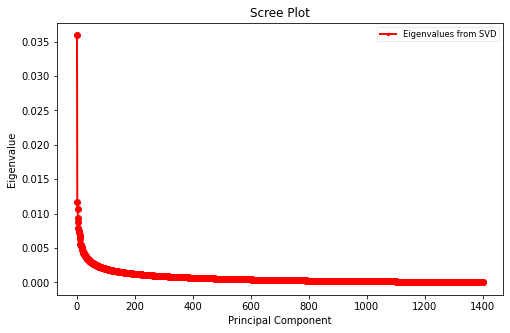

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


U, S, V = np.linalg.svd(termDocument_Matrix) 
eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(1400) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [53]:
K=1300

In [54]:
a = np.zeros((K, K), int)
np.fill_diagonal(a,S[:K])
a_inverse=np.linalg.inv(a) 

In [55]:
TF_IDF_matrix_reduced = np.dot(U[:,:K], np.dot(np.diag(S[:K]), V[:K, :]))
print(TF_IDF_matrix_reduced.shape)

(8839, 1400)


In [56]:
docs_rep = np.dot(np.diag(S[:K]), V[:K, :]) # N x K matrix 

In [57]:
print(docs_rep.shape)

(1300, 1400)


In [58]:
def findOrderedDocIDs_UsingVSM():
  doc_IDs_ordered = []
          # print(queriesVector)
  cosineSimilarites = np.zeros((len(processedQueries), len(doc_ids)))
  for i in range(len(processedQueries)):
    queryVector = queriesVector[:, i]
    
    #modifedQueryVector=np.dot(queryVector,np.dot(U[:, :K],a_inverse))
    #print(modifedQueryVector.shape)
    for j in range(len(doc_ids)):
      cosineSimilarites[i][j] = max(0, cosineSimilarityMeasure(queryVector, termDocument_Matrix[:,j] ))
  orderedSimilarities = np.argsort(cosineSimilarites)
  for i in range(len(processedQueries)):
    queryOrderlist = list()
    for j in range(len(doc_ids)):
      queryOrderlist.append(doc_ids[orderedSimilarities[i][len(doc_ids) - 1 - j]])
    doc_IDs_ordered.append(queryOrderlist)
  return doc_IDs_ordered

In [41]:
def findOrderedDocIDs_UsingLSA():
  doc_IDs_ordered = []
          # print(queriesVector)
  cosineSimilarites = np.zeros((len(processedQueries), len(doc_ids)))
  for i in range(len(processedQueries)):
    queryVector = queriesVector[:, i]
    
    modifedQueryVector=np.dot(queryVector,np.dot(U[:, :K],a_inverse))
    #print(modifedQueryVector.shape)
    for j in range(len(doc_ids)):
      cosineSimilarites[i][j] = max(0, cosineSimilarityMeasure(modifedQueryVector, docs_rep[:,j] ))
  orderedSimilarities = np.argsort(cosineSimilarites)
  for i in range(len(processedQueries)):
    queryOrderlist = list()
    for j in range(len(doc_ids)):
      queryOrderlist.append(doc_ids[orderedSimilarities[i][len(doc_ids) - 1 - j]])
    doc_IDs_ordered.append(queryOrderlist)
  return doc_IDs_ordered




In [60]:
doc_IDs_ordered_LSA = findOrderedDocIDs_UsingLSA()

In [59]:
doc_IDs_ordered_VSM = findOrderedDocIDs_UsingVSM()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Precision, Recall and F-score @ 1 : 0.6355555555555555, 0.10864526330604757, 0.17863320256997411
MAP, nDCG @ 1 : 0.6355555555555555, 0.6355555555555555
Precision, Recall and F-score @ 2 : 0.5444444444444444, 0.18010201378438814, 0.2543361515749991
MAP, nDCG @ 2 : 0.6844444444444444, 0.6839094862925976
Precision, Recall and F-score @ 3 : 0.47703703703703715, 0.2253680232909763, 0.2845791231814223
MAP, nDCG @ 3 : 0.6911111111111113, 0.6960323045042082
Precision, Recall and F-score @ 4 : 0.4211111111111111, 0.25797901855369565, 0.29614574536328714
MAP, nDCG @ 4 : 0.690493827160494, 0.7045976287915199
Precision, Recall and F-score @ 5 : 0.37955555555555576, 0.2850613598641071, 0.30061591085229983
MAP, nDCG @ 5 : 0.6812037037037038, 0.7110658635404503
Precision, Recall and F-score @ 6 : 0.3533333333333333, 0.3148780819945549, 0.3079232715743815
MAP, nDCG @ 6 : 0.671777777777778, 0.7147610250271377
Precision, Recall and F-score @ 7 : 0.3307936507936509, 0.3395813376246637, 0.3097675311094301

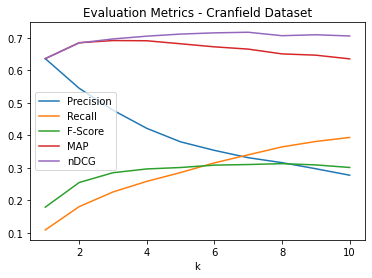

In [61]:
Model_VSM=EvaluateSystem(doc_IDs_ordered_VSM)

Precision, Recall and F-score @ 1 : 0.5066666666666667, 0.08852735470774684, 0.1447814996346799
MAP, nDCG @ 1 : 0.5066666666666667, 0.5066666666666667
Precision, Recall and F-score @ 2 : 0.41333333333333333, 0.13741355057433477, 0.1945205730949736
MAP, nDCG @ 2 : 0.5622222222222222, 0.5663916293629991
Precision, Recall and F-score @ 3 : 0.34962962962962957, 0.1710761688690696, 0.21437376770804892
MAP, nDCG @ 3 : 0.5744444444444442, 0.5897810193089279
Precision, Recall and F-score @ 4 : 0.31555555555555553, 0.20526583854379674, 0.23118910803076476
MAP, nDCG @ 4 : 0.5709876543209876, 0.5999284596653988
Precision, Recall and F-score @ 5 : 0.29866666666666697, 0.2341999336196874, 0.24310820060588964
MAP, nDCG @ 5 : 0.562320987654321, 0.6059021953980419
Precision, Recall and F-score @ 6 : 0.2688888888888887, 0.24667179718507082, 0.23769777366092787
MAP, nDCG @ 6 : 0.5578962962962964, 0.6100799295864076
Precision, Recall and F-score @ 7 : 0.24761904761904785, 0.2641915732466425, 0.2361390395

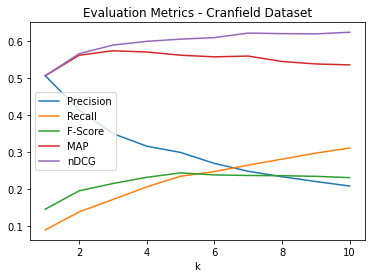

In [62]:
Model_LSA=EvaluateSystem(doc_IDs_ordered_LSA)

In [ ]:
# terms = vectorizer.get_feature_names()

# for i, comp in enumerate(svd_model.components_):
#     terms_comp = zip(terms, comp)
#     sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
#     print("Topic "+str(i)+": ")
#     for t in sorted_terms:
#         print(t[0])
#     print(" ")

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(stop_words='english', 
#                              max_df = 0.5, 
#                              smooth_idf=True)

# X = vectorizer.fit_transform(detokenized_doc)

In [ ]:
# with open('preprocessedDocsWithSpellChecker.txt','w') as f:
#   for i in range(len(processedDocs)):
#     for j in range(len(processedDocs[i])):
#       for k in range(len(processedDocs[i][j])):
#         f.write(processedDocs[i][j][k]+" ")
#     f.write("\n")

In [ ]:
# detokenized_doc = []
# for i in range(len(processedDocs)):
#   for j in range(len(processedDocs[i])):
#     t = ' '.join(processedDocs[i][j])
#   detokenized_doc.append(t)

In [123]:
# from scipy.spatial.distance import cosine
# doc_IDs_ordered=[]
# for i in range(len(processedQueries)):
#   query_rep = lsa_query_rep(processedQueries[i][0])
#   query_doc_cos_dist = [1-cosine(query_rep, doc_rep) for doc_rep in docs_rep]
#   query_doc_sort_index = np.argsort(np.array(query_doc_cos_dist))[::-1]
#   doc_IDs_ordered.append(query_doc_sort_index)

# # for rank, sort_index in enumerate(query_doc_sort_index):
# #     print(rank)
# #     print(sort_index)

In [ ]:
# from scipy.linalg import svd
# u, s, vt = svd(termDocument_Matrix)
# k = 800
# U = u[:, :k]
# S = s[:k]
# a = np.zeros((k, k), int)
# np.fill_diagonal(a,S)
# Vt = vt[:k, :]  # Document vectors
# W = u[:, :k] @ np.diag(s[:k])  # Word vectors
# kRankApproximation = np.dot(np.dot(U, a), Vt)
# for i in range(len(unique_unigrams)):
#   for j in range(len(doc_ids)):
#     kRankApproximation[i][j] = max(0,kRankApproximation[i][j])
# print(kRankApproximation.shape)

(8131, 1400)


In [ ]:
# import numpy as np
# K=100
# # Applying SVD
# U, s, VT = np.linalg.svd(X.T.toarray()) # .T is used to take transpose and .toarray() is used to convert sparse matrix to normal matrix

# print(U.shape)
# print(s.shape)
# print(VT.shape)
# TF_IDF_matrix_reduced = np.dot(U[:,:K], np.dot(np.diag(s[:K]), VT[:K, :]))

# # Getting document and term representation
# terms_rep = np.dot(U[:,:K], np.diag(s[:K])) # M X K matrix where M = Vocabulary Size and N = Number of documents
# docs_rep = np.dot(np.diag(s[:K]), VT[:K, :]).T # N x K matrix 

Explicit Semantic Analysis

--2021-05-30 02:30:58--  https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18595787357 (17G) [application/octet-stream]
Saving to: ‘enwiki-latest-pages-articles.xml.bz2’

enwiki-latest-pages 100%[===================>]  17.32G  4.49MB/s    in 64m 44s 

2021-05-30 03:35:42 (4.57 MB/s) - ‘enwiki-latest-pages-articles.xml.bz2’ saved [18595787357/18595787357]



In [3]:
!pip install esa-wiki

In [9]:
!bunzip2 /content/enwiki-latest-pages-articles.xml.bz2


bunzip2: I/O or other error, bailing out.  Possible reason follows.
bunzip2: No space left on device
	Input file = /content/enwiki-latest-pages-articles.xml.bz2, output file = /content/enwiki-latest-pages-articles.xml
bunzip2: Deleting output file /content/enwiki-latest-pages-articles.xml, if it exists.


In [15]:
!python3 -m esa_wiki.xml_parse /content/enwiki-latest-pages-articles.xml

Parsing started... at Sun May 30 03:50:00 2021

Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/esa_wiki/xml_parse.py", line 264, in <module>
    ATST.parse(file_to_parse)
  File "/usr/lib/python3.7/xml/sax/expatreader.py", line 105, in parse
    source = saxutils.prepare_input_source(source)
  File "/usr/lib/python3.7/xml/sax/saxutils.py", line 364, in prepare_input_source
    f = urllib.request.urlopen(source.getSystemId())
  File "/usr/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/usr/lib/python3.7/urllib/request.py", line 510, in open
    req = Request(fullurl, data)
  File "/usr/lib/python3.7/urllib/request.py", line 328, in __init__
    self.full_url = url
  File "/usr/lib/python3.7/urllib/request.py", li

In [11]:
!python3 -m esa_wiki.generate_indices

Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/esa_wiki/generate_indices.py", line 153, in <module>
    main()
  File "/usr/local/lib/python3.7/dist-packages/esa_wiki/generate_indices.py", line 35, in main
    raise IOError
OSError


In [12]:
!python3 -m esa_wiki.matrix_builder

Reading in word/index data at Sun May 30 03:48:11 2021

Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/esa_wiki/matrix_builder.py", line 218, in <module>
    main()
  File "/usr/local/lib/python3.7/dist-packages/esa_wiki/matrix_builder.py", line 39, in main
    word2index = shared.load(open(matrix_dir + 'word2index.ind', 'r'))
FileNotFoundError: [Errno 2] No such file or directory: 'matrix/word2index.ind'


In [ ]:
# detokenized_doc = []
# for i in range(len(processedDocs)):
#   for j in range(len(processedDocs[i])):
#     t = ' '.join(processedDocs[i][j])
#   detokenized_doc.append(t)

In [ ]:
with open(train_filename, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")